In [1]:
import gym
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

In [4]:
from pkg_resources import get_distribution
import platform
print("python", platform.python_version())
print("")
libs = ["numpy", "matplotlib", "gym"]
for lib in libs:
    version = get_distribution(lib).version
    print(lib, version)

python 3.5.2

numpy 1.13.1
matplotlib 2.0.2
gym 0.9.2


[2017-08-21 18:35:46,470] Making new env: FrozenLake-v0


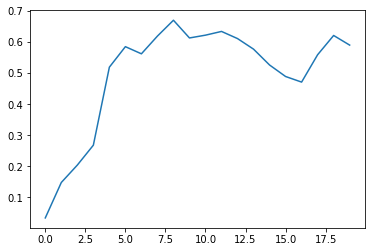

In [2]:
env = gym.make("FrozenLake-v0")
n_obs = env.observation_space.n
n_act = env.action_space.n
q = np.zeros([n_obs, n_act])
epoch_cnt = 20000
max_steps = 200
epsilon = 0.001
gamma = 0.9
alpha = 0.9
 
rewards = np.zeros(epoch_cnt)
for epoch in range(epoch_cnt):
    pobs = env.reset()
    done = False
    for step in range(max_steps):
        pact = np.argmax(q[pobs, :])
        pact = np.random.choice(np.where(q[pobs, :] == q[pobs, pact])[0])
        if np.random.rand() <= epsilon:
            pact = env.action_space.sample()
        obs, reward, done, _ = env.step(pact) # return observation, reward, done, info
        if not done:
            q[pobs, pact] += alpha * (reward - q[pobs, pact] + gamma * np.max(q[obs, :]))
        else:
            q[pobs, pact] += alpha * (reward - q[pobs, pact])
        pobs = obs
        rewards[epoch] = reward
        if done:
            break
rates = np.average(rewards.reshape([epoch_cnt//1000, 1000]), axis = 1)
plt.plot(rates)
plt.show()